<a href="https://colab.research.google.com/github/KamranRiyaz/MachineLearning-Using-Python/blob/main/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataframe = pd.read_csv('Social_Network_Ads.csv')
X = dataframe.iloc[:,:-1].values
y = dataframe.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [9]:
print(X_train)

[[    20  49000]
 [    46  88000]
 [    31  34000]
 [    47  30000]
 [    35  50000]
 [    39  96000]
 [    33 113000]
 [    49  86000]
 [    45  79000]
 [    44  39000]
 [    41  59000]
 [    42  53000]
 [    35  73000]
 [    41  72000]
 [    27  96000]
 [    30 116000]
 [    41  52000]
 [    41  52000]
 [    20  82000]
 [    46  41000]
 [    27  31000]
 [    35  71000]
 [    49  28000]
 [    35  91000]
 [    37  75000]
 [    32 117000]
 [    36  75000]
 [    20  86000]
 [    38  50000]
 [    49  36000]
 [    40  65000]
 [    37  77000]
 [    60  46000]
 [    48 138000]
 [    40  71000]
 [    36  63000]
 [    26  81000]
 [    33  31000]
 [    41  51000]
 [    46  74000]
 [    18  82000]
 [    37  33000]
 [    35  53000]
 [    28  59000]
 [    37  71000]
 [    18  44000]
 [    38  61000]
 [    35  65000]
 [    31  66000]
 [    47  25000]
 [    42 104000]
 [    19  19000]
 [    21  72000]
 [    28  32000]
 [    52 150000]
 [    53 104000]
 [    25  80000]
 [    26  72000]
 [    26  1500

In [10]:
print(y_train)

[0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0]


In [11]:
print(X_test)

[[    36  33000]
 [    39  61000]
 [    36 118000]
 [    39 122000]
 [    26 118000]
 [    38  65000]
 [    20  36000]
 [    49  89000]
 [    31  18000]
 [    48 141000]
 [    34  72000]
 [    39  73000]
 [    35  72000]
 [    48 131000]
 [    53  82000]
 [    56 133000]
 [    60  83000]
 [    27  58000]
 [    28  87000]
 [    60 102000]
 [    40  75000]
 [    50  88000]
 [    44 139000]
 [    47  43000]
 [    45  26000]
 [    26  15000]
 [    58  47000]
 [    49  74000]
 [    53  34000]
 [    52 114000]
 [    39  42000]
 [    19  76000]
 [    18  86000]
 [    57  74000]
 [    27  84000]
 [    30  80000]
 [    22  18000]
 [    32  86000]
 [    50  20000]
 [    19  25000]
 [    47 144000]
 [    58 101000]
 [    34 115000]
 [    23  66000]
 [    56  60000]
 [    31 118000]
 [    48  35000]
 [    47 113000]
 [    39  79000]
 [    52  38000]
 [    24  58000]
 [    37  53000]
 [    42  80000]
 [    46  28000]
 [    42  73000]
 [    37  62000]
 [    60  42000]
 [    36  52000]
 [    58  9500

In [12]:
print(y_test)

[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0]


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVM model on the Training set

In [14]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train,y_train)

LinearSVC()

## Predicting a new result

In [21]:
print(classifier.predict(sc.transform([[80,80000]])))

[1]


## Predicting the Test set results

In [23]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0]


## Making the Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
score = accuracy_score(y_test,y_pred,normalize = False)

In [27]:
print(cm)

[[52  6]
 [12 30]]


In [30]:
print(accuracy)

0.82


In [33]:
print(score)

82.0


## Visualising the Training set results

## Visualising the Test set results

KeyboardInterrupt: 

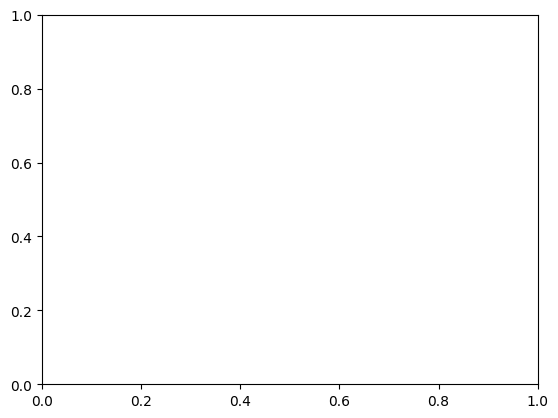

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
# Create a grid of points
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25)
)
# Predict for each point on the grid
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Define colors for scatter plot
colors = ['#FA8072', '#1E90FF']
# Plot the test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors[i], label=j
    )
# Add titles and labels
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()